### Importing Dependencies

In [ ]:
import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from matplotlib.pyplot import figure

### Importing the Dataset

In [ ]:
uploaded = files.upload()

Saving task_data.csv to task_data.csv


In [ ]:
user_data = pd.read_csv('user_data.csv')

In [ ]:
uploaded = files.upload()

Saving income_data.csv to income_data.csv


In [ ]:
income_data = pd.read_csv('income_data.csv')

In [ ]:
uploaded = files.upload()

Saving user_data.csv to user_data.csv


In [ ]:
task_data = pd.read_csv('task_data.csv')

## Task - 1
Create a Python Script that given a worker id, Calculate earnings per day

In [ ]:
# earnings per day = total earnings/number of days the worker has been on Toloka
# for getting the total income, we will be using the income data

In [ ]:
def calc_earnings_per_day(worker_id):
  i_data = income_data[["uid", "income"]]
  df_new = i_data.groupby('uid').sum()
  newdf = df_new.merge(user_data[['uid','joined']], how='outer', on='uid')
  newdf['todays_date'] = pd.Timestamp.today().strftime('%Y-%m-%d')
  newdf[['joined','todays_date']] = newdf[['joined','todays_date']].apply(pd.to_datetime)
  newdf['joined'] = newdf['joined'].dt.strftime('%Y-%m-%d')
  newdf["joined"] = pd.to_datetime(newdf["joined"], format='%Y-%m-%d')
  newdf['days'] = (newdf['todays_date']- newdf['joined']).dt.days
  newdf['per_day'] = newdf['income']/newdf['days']
  earnings = newdf.loc[newdf['uid'] == worker_id, 'per_day'].iloc[0]
  print('The total earnings per day of worker - ' + str(worker_id) + ' = ' + '\033[1m' + str(round(earnings, 3)) + '\033[1m' + '$')

In [ ]:
calc_earnings_per_day(1430094402)

The total earnings per day of worker - 1430094402 = 0.006$


In [ ]:
calc_earnings_per_day(1316040758)

The total earnings per day of worker - 1316040758 = 0.01$


In [ ]:
calc_earnings_per_day(1429235843)

The total earnings per day of worker - 1429235843 = 0.011$


In [ ]:
calc_earnings_per_day(1458049517)

The total earnings per day of worker - 1458049517 = 0.016$


In [ ]:
calc_earnings_per_day(1490584733)

The total earnings per day of worker - 1490584733 = 0.078$


In [ ]:
calc_earnings_per_day(1713698815)

The total earnings per day of worker - 1713698815 = 0.01$


In [ ]:
calc_earnings_per_day(1710096477)

The total earnings per day of worker - 1710096477 = 0.046$


In [ ]:
calc_earnings_per_day(1718416044)

The total earnings per day of worker - 1718416044 = 0.104$


In [ ]:
i_data = income_data[["uid", "income"]]
df_new = i_data.groupby('uid').sum()
newdf = df_new.merge(user_data[['uid','joined']], how='outer', on='uid')
newdf['todays_date'] = pd.Timestamp.today().strftime('%Y-%m-%d')
newdf[['joined','todays_date']] = newdf[['joined','todays_date']].apply(pd.to_datetime)
newdf['joined'] = newdf['joined'].dt.strftime('%Y-%m-%d')
newdf["joined"] = pd.to_datetime(newdf["joined"], format='%Y-%m-%d')
newdf['days'] = (newdf['todays_date']- newdf['joined']).dt.days
newdf['per_day'] = newdf['income']/newdf['days']
print(newdf.head())
# earnings = newdf.loc[newdf['uid'] == worker_id, 'per_day'].iloc[0]

          uid  income     joined todays_date  days   per_day
0  1316040758   7.659 2021-01-13  2023-02-02   750  0.010212
1  1429235843   6.717 2021-05-27  2023-02-02   616  0.010904
2  1430094402   3.520 2021-05-29  2023-02-02   614  0.005733
3  1458049517   8.757 2021-07-27  2023-02-02   555  0.015778
4  1490584733  38.084 2021-09-29  2023-02-02   491  0.077564


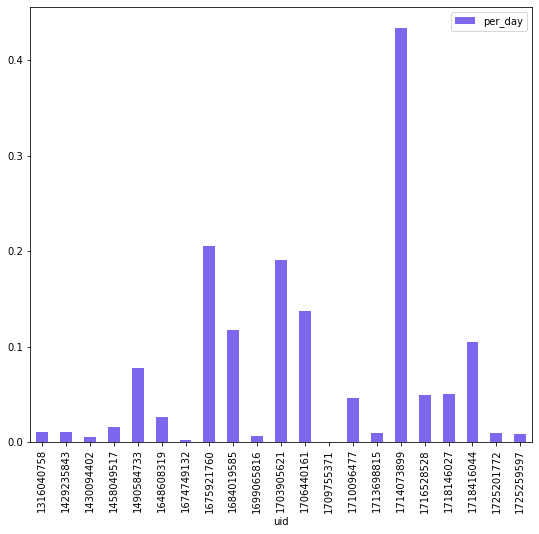

In [ ]:
newdf.plot(x="uid", y=["per_day"], kind="bar", figsize=(9, 8), color = 'mediumslateblue')

In [ ]:
user_data['uid'].unique()

array([1316040758, 1429235843, 1430094402, 1458049517, 1490584733,
       1648608319, 1674749132, 1675921760, 1684019585, 1699065816,
       1703905621, 1706440161, 1709755371, 1710096477, 1713698815,
       1714073899, 1716528528, 1718146027, 1718416044, 1725201772,
       1725259597])

In [ ]:
user_data.head()

,Unnamed: 0,uid,country,language,birthdate,joined
0,0,1316040758,EG,"AR,EN,",1984-03-11T00:00:00.000Z,2021-01-13T00:00:00.000Z
1,1,1429235843,KE,"EN,KI,SW,",1993-03-01T00:00:00.000Z,2021-05-27T00:00:00.000Z
2,2,1430094402,PK,"DE,EN,ES,ID,PT,RU,",1989-09-24T00:00:00.000Z,2021-05-29T00:00:00.000Z
3,3,1458049517,TR,"DE,EN,FR,RU,TR,",1996-12-16T00:00:00.000Z,2021-07-27T00:00:00.000Z
4,4,1490584733,ID,"EN,ID,",1982-03-13T00:00:00.000Z,2021-09-29T00:00:00.000Z


## Task - 2
Create a Python Script that provides analysis of Workers' wages (per country, per task language ,per type task, etc...)

##### 2.1 Workers' Wages per Country

In [ ]:
# Workers' wages per country = avg wage per country (total wage in that country divide by number of tasks)

In [ ]:
def calc_wages_per_country(income_data, user_data):
  income_data = income_data[["uid", "income"]]
  df_new = income_data.groupby('uid').sum()
  newdf = df_new.merge(user_data[['uid','joined']], how='outer', on='uid')
  df8 = newdf.merge(user_data[['uid','country', 'language']], how='outer', on='uid')
  df3 = df8[['country', 'income']]
  wage_per_country = df3.groupby('country')['income'].mean()
  return wage_per_country

In [ ]:
wage_per_country = calc_wages_per_country(income_data, user_data)
print(wage_per_country)

country
EG     6.304667
ET     9.018000
ID    36.174000
KE     2.617333
PE     6.135000
PH    19.165000
PK    11.466000
TR     8.757000
US     3.578000
Name: income, dtype: float64


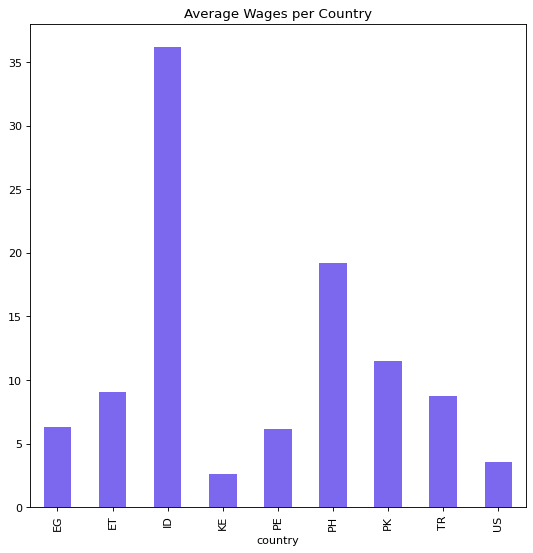

In [ ]:
figure(figsize=(8, 8), dpi=80)
p1 = wage_per_country.plot(kind='bar', title='Average Wages per Country', color = 'mediumslateblue')

#### 2.2 Average wages of workers as per the language of the task

In [ ]:
def calc_wages_per_tasklang(income_data, task_data):
  df_new = income_data.merge(task_data[['project_id', 'lang']], how='inner', on='project_id')
  df_new = df_new.drop_duplicates()
  df_new = df_new[['lang', 'income']]
  df5 = df_new.groupby('lang')['income'].mean()
  return df5

In [ ]:
wage_per_Tlang = calc_wages_per_tasklang(income_data, task_data)
print(wage_per_Tlang)

lang
DE    0.020000
EN    0.235976
FR    0.000000
RU    0.044381
Name: income, dtype: float64


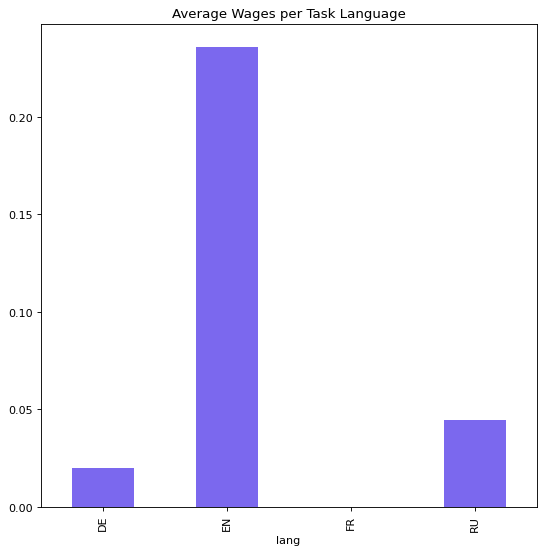

In [ ]:
figure(figsize=(8, 8), dpi=80)
p1 = wage_per_Tlang.plot(kind='bar', title='Average Wages per Task Language', color = 'mediumslateblue')

#### 2.3 Average wages of workers as per the language they know

In [ ]:
def calc_wage_per_userlang(income_data, user_data):
  income_data = income_data[["uid", "income"]]
  df_new = income_data.groupby('uid').sum()
  newdf = df_new.merge(user_data[['uid','joined']], how='outer', on='uid')
  df8 = newdf.merge(user_data[['uid','country', 'language']], how='outer', on='uid')
  df8['langs'] =  df8['language'].str.split(',')[:-1]
  df9 = df8.explode(['langs'])
  df9 = df9.reset_index()
  df9 = df9[['income', 'langs']]
  df9['langs'].replace('', np.nan, inplace=True)
  df9 = df9.dropna()
  df9 = df9.reset_index()
  df9 = df9[['income', 'langs']]
  df10 = df9.groupby('langs')['income'].mean()
  return df10

In [ ]:
wage_per_Ulang = calc_wage_per_userlang(income_data, user_data)
print(wage_per_Ulang)

langs
AM       17.558000
AR        7.986000
DE        9.456000
EN       10.535800
ES       15.417000
FR       13.713600
HE       19.412000
ID       25.289333
IT        6.135000
JA        0.000000
KI        6.717000
NL        6.135000
PT       19.138000
PT-BR    34.756000
RU       12.014667
SW        3.758500
TL       34.756000
TR        8.757000
Name: income, dtype: float64


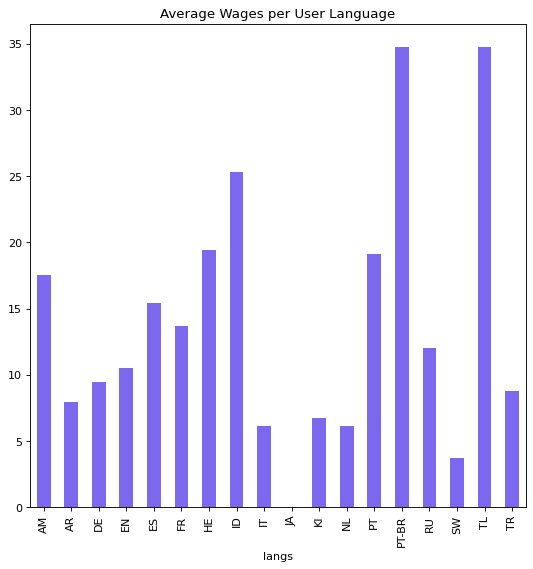

In [ ]:
figure(figsize=(8, 8), dpi=80)
p1 = wage_per_Ulang.plot(kind='bar', title='Average Wages per User Language', color = 'mediumslateblue')

## Task - 3
Create a Python Script that given a worker id find the time it took to complete a task (e.g. since it started until it finished)

In [ ]:
def completion_time(project_id, worker_id):
  df7 = income_data.merge(task_data[['project_id', 'pool_startedAt']], how='inner', on='project_id')
  df7 = df7.drop_duplicates()
  df7["date"] = pd.to_datetime(df7["date"], format='%Y-%m-%d')
  df7["pool_startedAt"] = pd.to_datetime(df7["pool_startedAt"], format='%Y-%m-%d')
  df7['days'] = (df7['date']- df7['pool_startedAt']).dt.days
  days = df7['days'].loc[(df7['project_id'] == project_id) & (df7['uid'] == worker_id)][0]
  print( ' The number of days taken by user '+ str(worker_id) + ' to complete the task ' + str(project_id) + ' = ' + str(days))

In [ ]:
completion_time(2338, 1458049517)

 The number of days taken by user 1458049517 to complete the task 2338 = 25


## Task - 4
Create a Python Script that provides analysis of Workers' wages , exploratory analysis (per country, per task language ,per type task, etc...)

Below is a visual representation and comparison of average wage of workers for each country

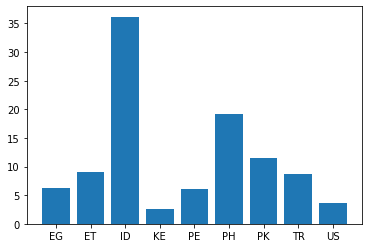

In [ ]:
p = plt.bar(wage_per_country.index, wage_per_country.values)

Below is a visual representation and comparison of average wage of workers as per the language of the task

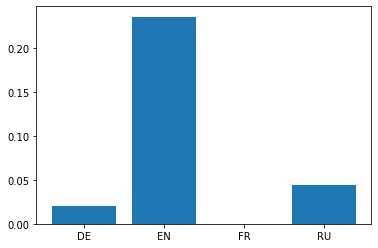

In [ ]:
p = plt.bar(wage_per_Tlang.index, wage_per_Tlang.values)

Below is a visual representation and comparison of average wage of workers as per the language that they know

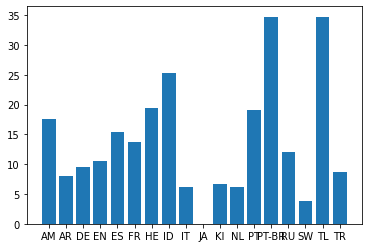

In [ ]:
p = plt.bar(wage_per_Ulang.index, wage_per_Ulang.values)